In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


OWD
Both Neuro and Mus: 1562
Only Neuro: 632
Only Mus: 963
Neither Neuro nor Mus: 3157
Dropping 99
(878, 31)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'musculo', 'neuro', 'neither', 'both'],
      dtype='object')
Original Working Definition: Neuro vs Musculo vs Both vs Neither
best accuracy:  0.41446808510638294  best params:  {'k': 2, 'lambda': 85.85858585858587, 'random_state': 0}
test_accuracy:  0.4318181818181818


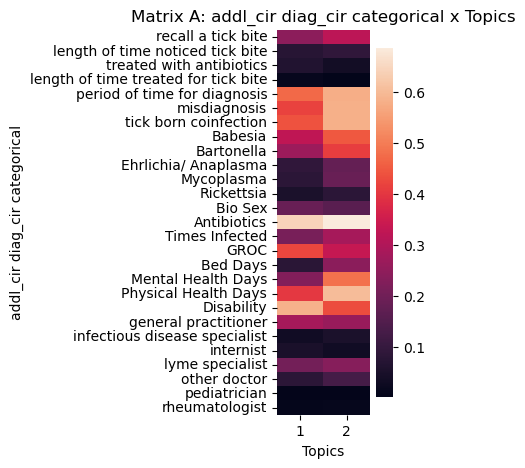

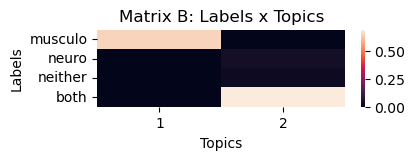

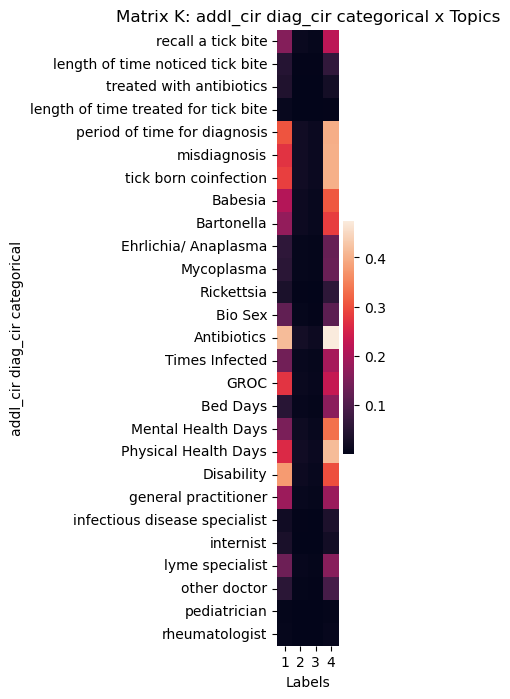

In [2]:
# Original Working Defn
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, MUSCULO, BOTH, NEITHER}, defn=DEF_OWD, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params = ssnmf.gridsearch()
print('Original Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

# Previous Result: (Might be wrong)
# best accuracy:  0.6282472137791286  best params:  {'k': 3, 'lambda': 56.56565656565657, 'random_state': 5}
# test_accuracy:  0.6136363636363636

# Obtained Result:
# Original Working Definition: Neuro vs Non-Neuro
# best accuracy:  0.622532928064843  best params:  {'k': 3, 'lambda': 66.66666666666667, 'random_state': 2}
# test_accuracy:  0.6420454545454546
names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)